Thông tin nhóm: Nhóm 2
- Vũ Nguyễn Trung Hiếu: 23122028
- Châu Văn Minh Khoa: 23122035
- Nguyễn Trần Trung Kiên: 23122038
- Phan Ngọc Quân: 23122035

**I. Đọc dữ liệu**

**Download thư viện**

In [1]:
%pip install gdown
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


**Import thư viện**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
import seaborn as sns
import json

**Tải xuống và đọc được toàn bộ tập dữ liệu**

In [3]:
file_id = "1y5KmPUHwS9V07FrIyqNAqoeSB1VS6NEj"
file_path = "train.csv"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, file_path, quiet=False)
with open(file_path, mode="r", encoding="utf-8") as file:
    content = file.read()
content

Downloading...
From: https://drive.google.com/uc?id=1y5KmPUHwS9V07FrIyqNAqoeSB1VS6NEj
To: d:\Hp\Documents\University\Nam 2\HK4\PPT for AI\LAB\Project_1\23122028_23122035_23122038_23122046\Source\train.csv
100%|██████████| 282k/282k [00:00<00:00, 1.25MB/s]


'Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity\nBMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,,,,,,,,,\nBMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0\nMahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0\nMercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0\nToyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0\nMaruti Suzuki,Vitara

**In ra một số thông tin của cả file train.csv: Số dòng, tên các cột**

In [62]:
with open(file_path, mode="r", encoding="utf-8") as file:
    lines = file.readlines()

header = lines[0].strip().split(",")
num_rows = len(lines) - 1

print(f"Số dòng: {num_rows}")
print("Tên các cột:", header)

Số dòng: 1647
Tên các cột: ['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']


**Đọc dữ liệu từ file và in ra 5 dòng đầu tiên của tập dữ liệu huấn luyện**

In [63]:
df = pd.read_csv('train.csv')
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,BMW,3-Series 320d,800000,2012,75576,Diesel,Automatic,Mumbai,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW,X1 sDrive20d xLine,2199000,2016,77000,Diesel,Automatic,Surat,Black,First,Individual,1995 cc,184 bhp @ 4000 rpm,350 Nm @ 1750 rpm,RWD,4454.0,2044.0,1545.0,5.0,63.0
2,Mahindra,XUV500 W4 1.99,800000,2017,112000,Diesel,Manual,Muzaffurpur,Silver,First,Individual,1997 cc,138 bhp @ 3750 rpm,320 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
3,Mercedes-Benz,GLS 400d 4MATIC,12900000,2021,3000,Diesel,Automatic,Delhi,White,First,Individual,2925 cc,326 bhp @ 3600 rpm,700 Nm @ 1200 rpm,AWD,5207.0,2157.0,1823.0,7.0,90.0
4,Toyota,Fortuner 2.8 4x2 AT [2016-2020],3499000,2019,73000,Diesel,Automatic,Mumbai,White,First,Individual,2755 cc,174 bhp @ 3400 rpm,450 Nm @ 1600 rpm,RWD,4795.0,1855.0,1835.0,7.0,80.0


**II. Tiền xử lý dữ liệu**

**Khởi tạo biến lưu trữ**

In [64]:
store_values = {}

**Loại bỏ cột Model**

In [65]:
df = df.drop(columns=['Model'])

**Chuyển đổi dữ liệu**

In [66]:
def clean_data(df):
    """
    Làm sạch các cột 'Engine', 'Max Power' và 'Max Torque' trong DataFrame.
    Nếu có NaN ở các cột này, sẽ giữ nguyên dòng nhưng không xử lý giá trị đó.

    Parameters:
    - df: DataFrame chứa dữ liệu

    Returns:
    - DataFrame với các cột đã làm sạch, giữ nguyên các cột khác.
    """
    df = df.copy()
    df["Engine"] = df["Engine"].str.extract(r'(\d+)').astype("float64")
    df["Max Power"] = df["Max Power"].str.extract(r'(\d+\.?\d*)')[0].astype("float64")
    df["Max Torque"] = df["Max Torque"].str.extract(r'(\d+\.?\d*)')[0].astype("float64")
    return df

df = clean_data(df)


**Xử lý các giá trị NaN**

In [67]:
num_mean = {}
str_mode = {}
for col in df.select_dtypes(include=[np.number]).columns.tolist():
    df[col] = df[col].fillna(df[col].mean())
    num_mean[col] = df[col].mean()
store_values['num_mean'] = num_mean
for col in df.select_dtypes(exclude=[np.number]).columns.tolist():
    df[col] = df[col].fillna(df[col].mode()[0])
    str_mode[col] = df[col].mode()[0]
store_values['str_mode'] = str_mode

**Lưu các giá trị đặc biệt**

**Chuẩn hóa dữ liệu**

In [68]:
def target_encoding(df, columns):
    """
    Chuẩn hóa các cột danh mục bằng giá trị số nguyên dựa trên giá trung bình của 'Price'.

    Parameters:
    - df: DataFrame chứa các cột danh mục và cột 'Price'.
    - columns: Danh sách các cột cần chuẩn hóa.

    Returns:
    - df: DataFrame với các cột danh mục được thay thế bằng giá trị chuẩn hóa.
    -
    """
    encoded_dict = {}
    for col in columns:
        avg_price = df.groupby(col)["Price"].mean()

        # Chuẩn hóa về khoảng số nguyên từ 0 đến 1000
        min_val = avg_price.min()
        max_val = avg_price.max()
        encoded_dict[col] = ((avg_price - min_val) / (max_val - min_val) * 1000).astype(int)

        # Ánh xạ giá trị chuẩn hóa vào DataFrame gốc
        df[col] = df[col].map(encoded_dict[col])
    return df, encoded_dict

df, encoded_dict = target_encoding(df, df.select_dtypes(include=['object', 'string']).columns.tolist())
store_values['encoded_dict'] = encoded_dict
df.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,151,800000,2012,75576,280,1000,521,565,338,468,1701.665613,129.896144,246.475766,0,4281.47837,1767.580564,1592.423824,5.310345,52.154656
1,151,2199000,2016,77000,280,1000,882,956,391,468,1995.000000,184.000000,350.000000,646,4454.00000,2044.000000,1545.000000,5.000000,63.000000
2,32,800000,2017,112000,280,0,167,276,391,468,1997.000000,138.000000,320.000000,0,4585.00000,1890.000000,1785.000000,7.000000,70.000000
3,171,12900000,2021,3000,280,1000,824,565,391,468,2925.000000,326.000000,700.000000,1000,5207.00000,2157.000000,1823.000000,7.000000,90.000000
4,61,3499000,2019,73000,280,1000,521,565,391,468,2755.000000,174.000000,450.000000,646,4795.00000,1855.000000,1835.000000,7.000000,80.000000


**Xử lý Outliers**

In [69]:
def cap_outliers(df, group_cols, value_col, range):
    """
    Giới hạn outliers của cột Price dựa trên các nhóm do group_cols xác định.

    Parameters:
    - df: DataFrame gốc.
    - group_cols: Danh sách các cột dùng để nhóm.
    - value_col: Cột số cần xử lý outliers.

    Returns:
    - DataFrame sau khi đã giới hạn outliers.
    """
    def cap_values(sub_df):
        Q1 = sub_df[value_col].quantile(range[0])
        Q3 = sub_df[value_col].quantile(range[1])
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        sub_df.loc[:, value_col] = np.clip(sub_df[value_col], lower_bound, upper_bound)
        return sub_df

    return df.groupby(group_cols, group_keys=False).apply(cap_values)



df = cap_outliers(df, ['Make'], 'Price', (0.2, 0.8))
df.head()

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,151,800000,2012,75576,280,1000,521,565,338,468,1701.665613,129.896144,246.475766,0,4281.47837,1767.580564,1592.423824,5.310345,52.154656
1,151,2199000,2016,77000,280,1000,882,956,391,468,1995.000000,184.000000,350.000000,646,4454.00000,2044.000000,1545.000000,5.000000,63.000000
2,32,800000,2017,112000,280,0,167,276,391,468,1997.000000,138.000000,320.000000,0,4585.00000,1890.000000,1785.000000,7.000000,70.000000
3,171,12900000,2021,3000,280,1000,824,565,391,468,2925.000000,326.000000,700.000000,1000,5207.00000,2157.000000,1823.000000,7.000000,90.000000
4,61,3499000,2019,73000,280,1000,521,565,391,468,2755.000000,174.000000,450.000000,646,4795.00000,1855.000000,1835.000000,7.000000,80.000000


**Feature Selection**

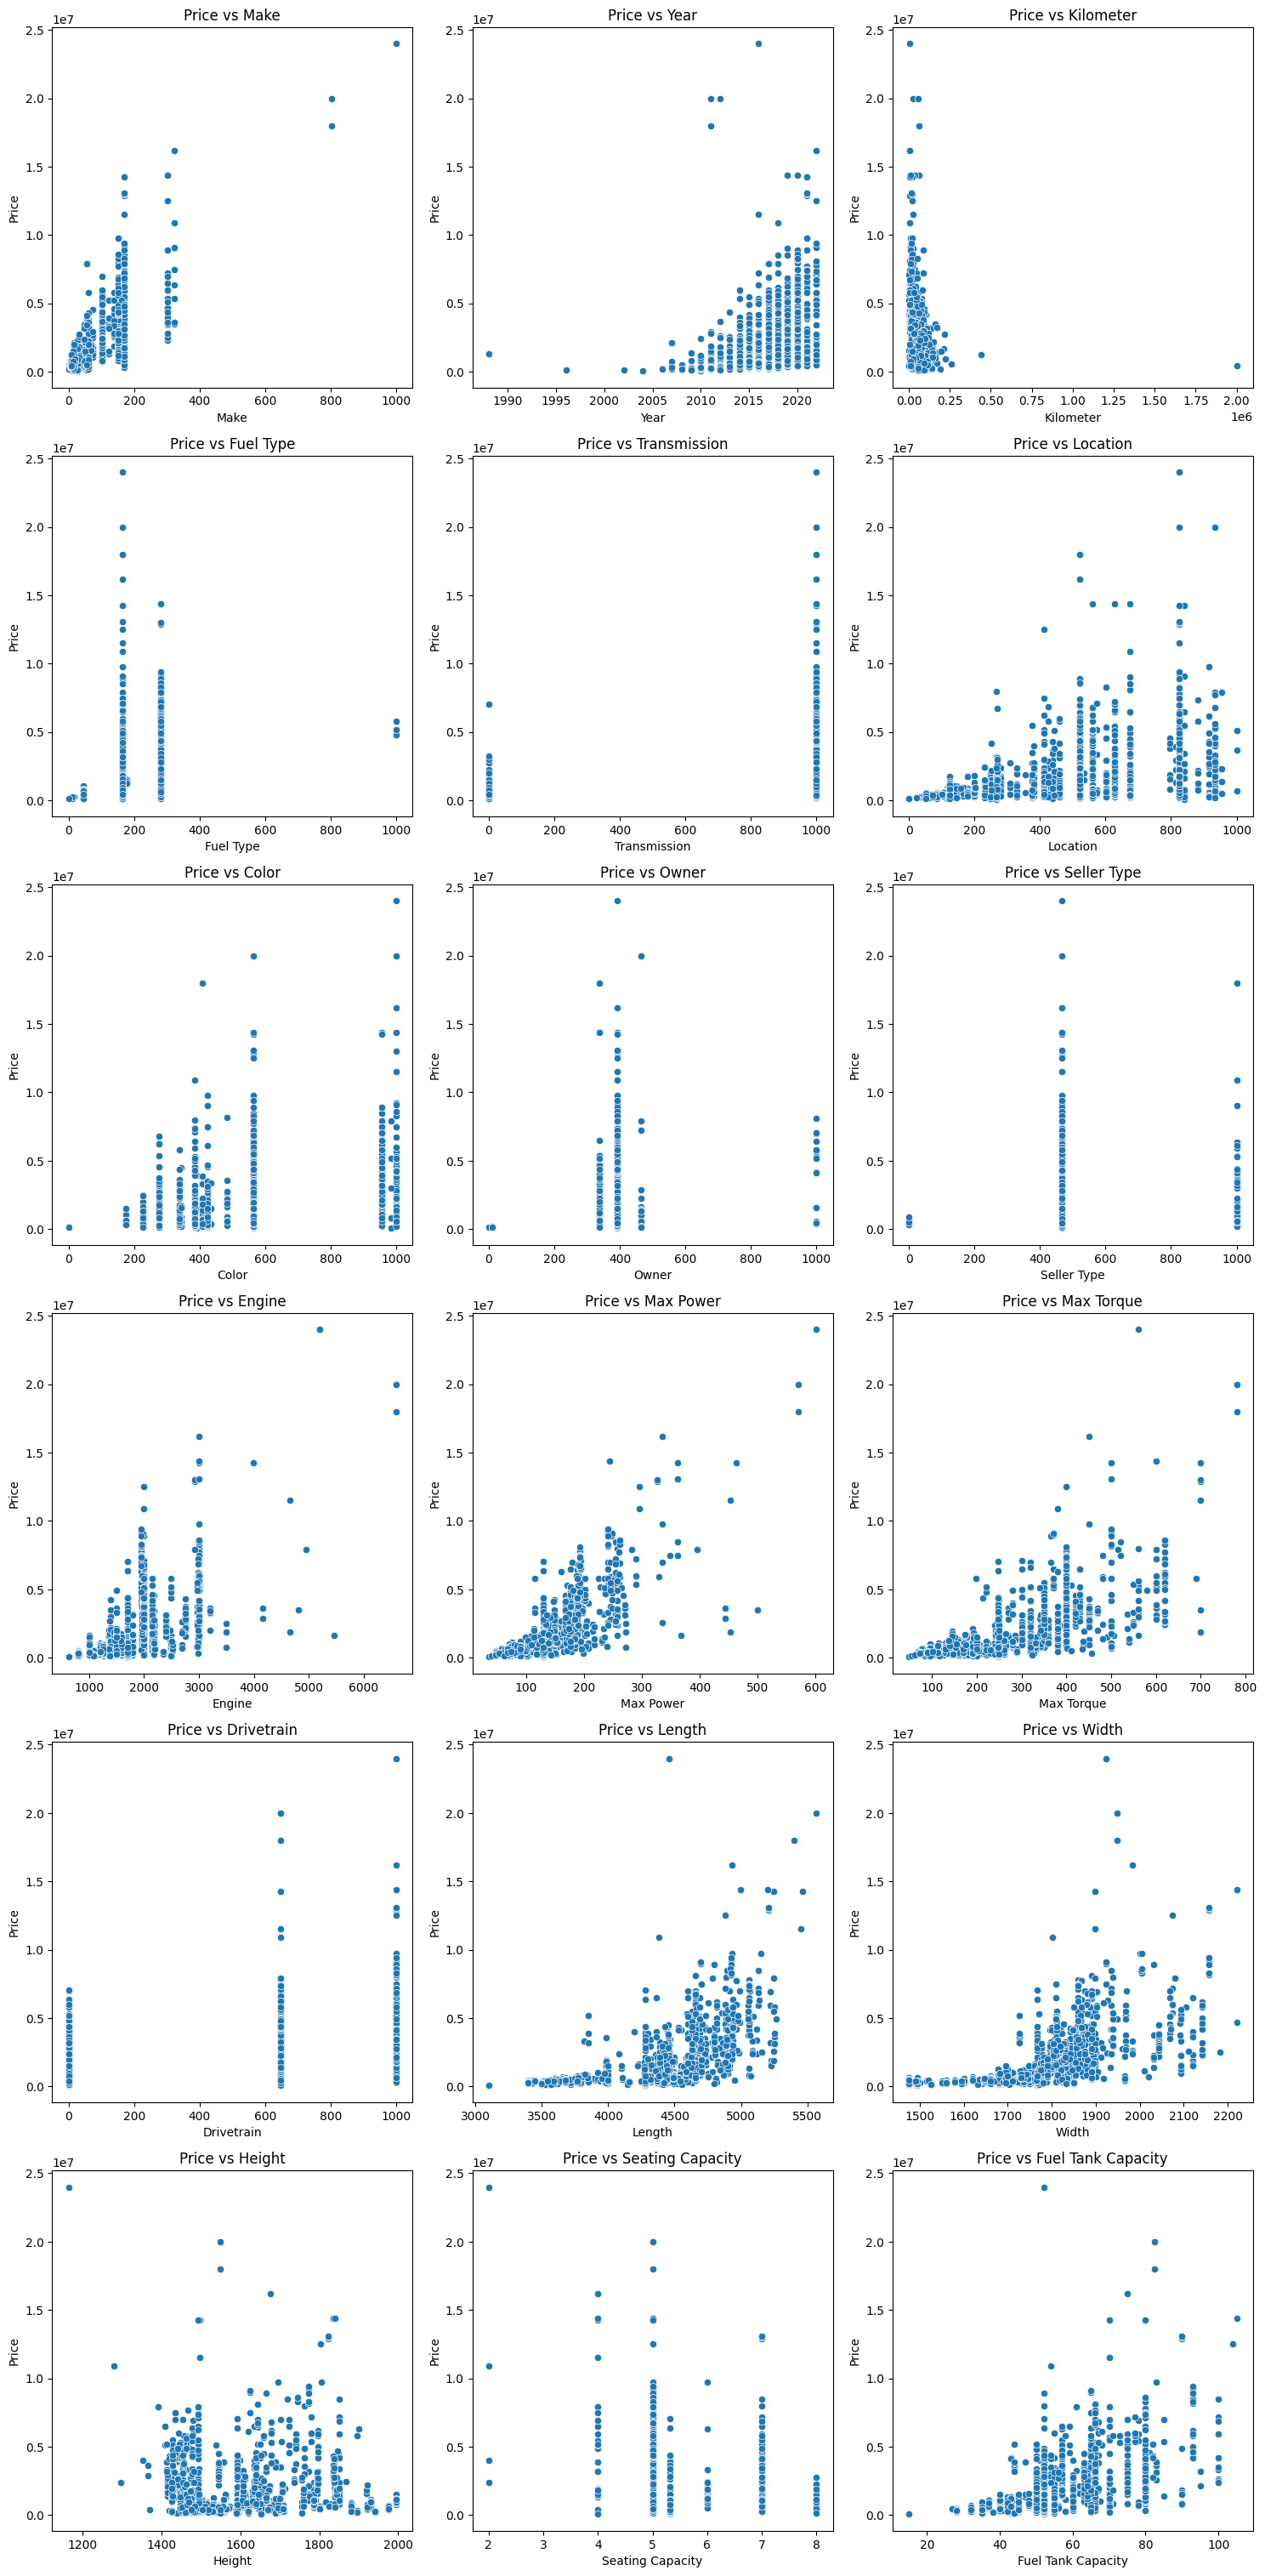

In [70]:
def plot_all_features(df, target_col='Price'):
    """
    Vẽ scatter plot giữa tất cả các cột trong DataFrame và cột mục tiêu.

    Parameters:
        df (pd.DataFrame): DataFrame chứa dữ liệu
        target_col (str): Tên cột mục tiêu (Price)
    """
    num_cols = df.select_dtypes(include=['number']).columns
    num_cols = [col for col in num_cols if col != target_col]

    num_features = len(num_cols)
    fig, axes = plt.subplots(nrows=num_features // 3 + 1, ncols=3, figsize=(15, 5 * (num_features // 3 + 1)))

    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.scatterplot(x=df[col], y=df[target_col], ax=axes[i])
        axes[i].set_title(f'{target_col} vs {col}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_all_features(df, target_col='Price')

**Dùng correlation**

In [71]:
def compute_correlations(df, target_col):
    """
    Tính hệ số tương quan Pearson của từng cột số trong DataFrame so với biến mục tiêu
    và sắp xếp giảm dần theo độ tương quan.

    Parameters:
    - df (pd.DataFrame): DataFrame chứa dữ liệu.
    - target_col (str): Tên cột mục tiêu.

    Returns:
    - pd.DataFrame: DataFrame chứa hệ số tương quan của từng cột số, sắp xếp giảm dần.
    """
    correlations = {}

    for col in df.select_dtypes(include=[np.number]).columns:
        if col != target_col:
            x = df[col].dropna()
            y = df[target_col].dropna()

            # Chỉ lấy phần tử chung giữa 2 cột
            common_index = x.index.intersection(y.index)
            x, y = x.loc[common_index], y.loc[common_index]

            # Tính toán các giá trị cần thiết
            mean_x, mean_y = x.mean(), y.mean()
            std_x, std_y = x.std(), y.std()

            # Hệ số tương quan Pearson
            cov_xy = ((x - mean_x) * (y - mean_y)).sum()
            corr = cov_xy / ((len(x) - 1) * std_x * std_y) if std_x * std_y != 0 else 0

            correlations[col] = corr

    # Chuyển sang DataFrame và sắp xếp giảm dần
    corr_df = pd.DataFrame(correlations.items(), columns=["Feature", "Correlation"])
    corr_df = corr_df.sort_values(by="Correlation", ascending=False).reset_index(drop=True)

    return corr_df

corr_df = compute_correlations(df, "Price")
print(corr_df)

               Feature  Correlation
0                 Make     0.799632
1            Max Power     0.797797
2           Max Torque     0.700823
3               Engine     0.648413
4   Fuel Tank Capacity     0.598806
5               Length     0.597798
6                Width     0.595368
7           Drivetrain     0.562720
8         Transmission     0.506532
9             Location     0.320892
10                Year     0.320227
11               Color     0.287476
12           Fuel Type     0.214555
13               Owner     0.130663
14         Seller Type     0.106216
15              Height     0.094977
16    Seating Capacity    -0.011283
17           Kilometer    -0.150170


In [72]:
feature_selected = ["Make", "Max Power", "Max Torque", "Engine", "Fuel Tank Capacity", "Length", "Width", "Year"]
X = df[feature_selected]
store_values['feature_selected'] = feature_selected
y = df['Price']
X.head()

,Make,Max Power,Max Torque,Engine,Fuel Tank Capacity,Length,Width,Year
0,151,129.896144,246.475766,1701.665613,52.154656,4281.47837,1767.580564,2012
1,151,184.000000,350.000000,1995.000000,63.000000,4454.00000,2044.000000,2016
2,32,138.000000,320.000000,1997.000000,70.000000,4585.00000,1890.000000,2017
3,171,326.000000,700.000000,2925.000000,90.000000,5207.00000,2157.000000,2021
4,61,174.000000,450.000000,2755.000000,80.000000,4795.00000,1855.000000,2019


**III. Xây dựng mô hình**

**1. Tìm hàm f(x)**

## Công thức của hàm $f(x)$

Giả sử ta đặt:

- $x_1$ = Make  
- $x_2$ = Max Power  
- $x_3$ = Max Torque  
- $x_4$ = Engine  
- $x_5$ = Fuel Tank Capacity  
- $x_6$ = Length  
- $x_7$ = Width  
- $x_8$ = Year  



$$
\begin{align}
f1(x) &= w_1 \cdot ((2025 - x_8) \cdot x_4) + \\
&w_2 \cdot (x_1 \cdot x_5) + \\
&w_3 \cdot (x_2 \cdot x_7) + \\
&w_4 \cdot (x_3 \cdot x_6) + \\
&w_5 \cdot x_4 + \\
&w_6 \cdot x_2 + \\
&w_7 \cdot (2025 - x_8) + \\
&w_8 \cdot x_4^2 + \\
&w_9 \cdot x_2^2 + \\
&w_{10} \cdot (x_6 \cdot x_7) + \\
&w_{11} \cdot \frac{x_2}{(2025 - x_8) + 1} + \\
&w_{12} \cdot \log(1 + x_4) + \\
&w_{13} \cdot \log(1 + x_2)
\end{align}
$$


In [73]:
def build_X_ver1(X_raw):
    X = pd.DataFrame()

    # Các tương tác hiện có
    X['Year_Engine'] = (2025 - X_raw['Year']) * X_raw['Engine']
    X['Make_Fuel'] = X_raw['Make'] * X_raw['Fuel Tank Capacity']
    X['MaxPower_Width'] = X_raw['Max Power'] * X_raw['Width']
    X['MaxTorque_Length'] = X_raw['Max Torque'] * X_raw['Length']

    # Các tính năng bổ sung
    X['Engine'] = X_raw['Engine']
    X['Max_Power'] = X_raw['Max Power']
    X['Car_Age'] = 2025 - X_raw['Year']

    # Các tính năng bậc hai
    X['Engine_Squared'] = X_raw['Engine'] ** 2
    X['MaxPower_Squared'] = X_raw['Max Power'] ** 2

    # Xấp xỉ thể tích
    X['Volume'] = X_raw['Length'] * X_raw['Width']

    # Tỷ lệ công suất trên tuổi
    X['Power_Age_Ratio'] = X_raw['Max Power'] / (2025 - X_raw['Year'] + 1)

    # Biến đổi log cho các tính năng lệch
    X['Log_Engine'] = np.log1p(X_raw['Engine'])
    X['Log_MaxPower'] = np.log1p(X_raw['Max Power'])

    return X

$$
\begin{align}
f2(x) &= w_1 \cdot x_8 + \\
&w_2 \cdot x_4 + \\
&w_3 \cdot x_2 + \\
&w_4 \cdot x_3 + \\
&w_5 \cdot x_1 + \\
&w_6 \cdot x_5 + \\
&w_7 \cdot x_6 + \\
&w_8 \cdot x_7 + \\
&w_9 \cdot (2025 - x_8) + \\
&w_{10} \cdot (x_6 \cdot x_7) + \\
&w_{11} \cdot ((2025 - x_8) \cdot x_4) + \\
&w_{12} \cdot (x_1 \cdot x_5) + \\
&w_{13} \cdot (x_2 \cdot x_7) + \\
&w_{14} \cdot (x_3 \cdot x_6) + \\
&w_{15} \cdot \frac{x_2}{(x_6 \cdot x_7) + 10^{-6}} + \\
&w_{16} \cdot \frac{x_3}{(x_6 \cdot x_7) + 10^{-6}} + \\
&w_{17} \cdot \frac{x_2}{(2025 - x_8) + 1} + \\
&w_{18} \cdot x_4^2 + \\
&w_{19} \cdot x_2^2 + \\
&w_{20} \cdot \log(1 + x_4) + \\
&w_{21} \cdot \log(1 + x_2)
\end{align}
$$

In [74]:
def build_X_ver2(X_raw):
    X = pd.DataFrame()

    # Biến gốc
    X['Year'] = X_raw['Year']
    X['Engine'] = X_raw['Engine']
    X['Max_Power'] = X_raw['Max Power']
    X['Max_Torque'] = X_raw['Max Torque']
    X['Make'] = X_raw['Make']
    X['Fuel_Capacity'] = X_raw['Fuel Tank Capacity']
    X['Length'] = X_raw['Length']
    X['Width'] = X_raw['Width']

    # Dẫn xuất
    X['Car_Age'] = 2025 - X['Year']
    X['Volume'] = X['Length'] * X['Width']

    # Tương tác
    X['Year_Engine'] = X['Car_Age'] * X['Engine']
    X['Make_Fuel'] = X['Make'] * X['Fuel_Capacity']
    X['MaxPower_Width'] = X['Max_Power'] * X['Width']
    X['MaxTorque_Length'] = X['Max_Torque'] * X['Length']

    # Biến tỷ lệ
    X['Power_per_Volume'] = X['Max_Power'] / (X['Volume'] + 1e-6)
    X['Torque_per_Volume'] = X['Max_Torque'] / (X['Volume'] + 1e-6)
    X['Power_Age_Ratio'] = X['Max_Power'] / (X['Car_Age'] + 1)

    # Biến bậc hai
    X['Engine_Squared'] = X['Engine'] ** 2
    X['MaxPower_Squared'] = X['Max_Power'] ** 2

    # Biến log
    X['Log_Engine'] = np.log1p(X['Engine'])
    X['Log_MaxPower'] = np.log1p(X['Max_Power'])

    return X

$$
\begin{align}
f3(x) &= w_1 \cdot (2025 - x_8) + \\
&w_2 \cdot (x_6 \cdot x_7) + \\
&w_3 \cdot x_4 + \\
&w_4 \cdot x_2 + \\
&w_5 \cdot x_5 + \\
&w_6 \cdot x_1 + \\
&w_7 \cdot \frac{x_4}{(2025 - x_8) + 1} + \\
&w_8 \cdot \frac{x_2}{x_4 + 10^{-6}} + \\
&w_9 \cdot \frac{x_5}{(x_6 \cdot x_7) + 10^{-6}} + \\
&w_{10} \cdot (x_1 \cdot x_2) + \\
&w_{11} \cdot \log(1 + x_4) + \\
&w_{12} \cdot \log(1 + x_2) + \\
&w_{13} \cdot \log(1 + (2025 - x_8)) + \\
&w_{14} \cdot \log(1 + x_1) + \\
&w_{15} \cdot \left(\frac{x_2}{x_5 + 1} \cdot \frac{x_4}{(2025 - x_8) + 1}\right) + \\
&w_{16} \cdot \frac{x_1 \cdot x_5}{(2025 - x_8) + 1}
\end{align}
$$

In [75]:
def build_X_ver3(X_raw):
    X = pd.DataFrame()

    X['Car_Age'] = 2025 - X_raw['Year']
    X['Volume'] = X_raw['Length'] * X_raw['Width']
    X['Engine'] = X_raw['Engine']
    X['Power'] = X_raw['Max Power']
    X['Fuel'] = X_raw['Fuel Tank Capacity']
    X['Make'] = X_raw['Make']
    X['Engine_per_Age'] = X['Engine'] / (X['Car_Age'] + 1)
    X['Power_per_Engine'] = X['Power'] / (X['Engine'] + 1e-6)
    X['Fuel_per_Volume'] = X['Fuel'] / (X['Volume'] + 1e-6)
    X['Make_x_Power'] = X['Make'] * X['Power']
    X['Log_Engine'] = np.log1p(X['Engine'])
    X['Log_Power'] = np.log1p(X['Power'])
    X['Log_Car_Age'] = np.log1p(X['Car_Age'])
    X['Log_Make'] = np.log1p(X['Make'])
    X['Efficiency_Score'] = (X['Power'] / (X['Fuel'] + 1)) * X['Engine_per_Age']
    X['Make_Fuel_Interaction'] = (X['Make'] * X['Fuel']) / (X['Car_Age'] + 1)

    return X

$$
\begin{align}
f_4(x) &= w_1 \cdot (2025 - x_1) + \\
       & w_2 \cdot (x_6 \cdot x_7) + \\
       & w_3 \cdot x_2 + \\
       & w_4 \cdot x_3 + \\
       & w_5 \cdot x_4 + \\
       & w_6 \cdot x_5 + \\
       & w_7 \cdot x_8 + \\
       & w_8 \cdot x_9 \cdot x_8 + \\
       & w_9 \cdot x_9 \cdot x_5 + \\
       & w_{10} \cdot x_3 \cdot x_7 + \\
       & w_{11} \cdot x_4 \cdot x_6 + \\
       & w_{12} \cdot x_9 \cdot x_3 + \\
       & w_{13} \cdot \left( \frac{x_3}{x_2 + \varepsilon} \right) + \\
       & w_{14} \cdot \left( \frac{x_3}{x_6 \cdot x_7 + \varepsilon} \right) + \\
       & w_{15} \cdot \left( \frac{x_4}{x_6 \cdot x_7 + \varepsilon} \right) + \\
       & w_{16} \cdot \left( \frac{x_3}{2025 - x_1 + 1} \right) + \\
       & w_{17} \cdot x_2^2 + \\
       & w_{18} \cdot x_3^2 + \\
       & w_{19} \cdot x_4^2 + \\
       & w_{20} \cdot \log(1 + x_2) + \\
       & w_{21} \cdot \log(1 + x_3) + \\
       & w_{22} \cdot \log(1 + x_4) + \\
       & w_{23} \cdot \log(1 + (2025 - x_1)) + \\
       & w_{24} \cdot \left( \frac{x_3 \cdot x_2}{x_5 + 1} \right) + \\
       & w_{25} \cdot \left( \frac{x_4}{x_3 + 1} \right) + \\
       & w_{26} \cdot \left( \frac{x_3}{x_2 + \varepsilon} \cdot \frac{x_3}{2025 - x_1 + 1} \right)
\end{align}
$$

In [76]:
def build_X_ver4(X_raw):
    X = pd.DataFrame()

    # 1. Biến gốc & dẫn xuất đơn giản
    X['Car_Age'] = 2025 - X_raw['Year']
    X['Volume'] = X_raw['Length'] * X_raw['Width']
    X['Engine'] = X_raw['Engine']
    X['Max_Power'] = X_raw['Max Power']
    X['Max_Torque'] = X_raw['Max Torque']
    X['Fuel_Capacity'] = X_raw['Fuel Tank Capacity']
    X['Make'] = X_raw['Make']

    # 2. Các tương tác mạnh mẽ
    X['Year_Engine'] = X['Car_Age'] * X['Engine']
    X['Make_Fuel'] = X['Make'] * X['Fuel_Capacity']
    X['Power_Width'] = X['Max_Power'] * X_raw['Width']
    X['Torque_Length'] = X['Max_Torque'] * X_raw['Length']
    X['Make_x_Power'] = X['Make'] * X['Max_Power']

    # 3. Biến tỷ lệ thông minh
    X['Power_per_Engine'] = X['Max_Power'] / (X['Engine'] + 1e-6)
    X['Power_per_Volume'] = X['Max_Power'] / (X['Volume'] + 1e-6)
    X['Torque_per_Volume'] = X['Max_Torque'] / (X['Volume'] + 1e-6)
    X['Power_Age_Ratio'] = X['Max_Power'] / (X['Car_Age'] + 1)

    # 4. Biến bậc hai để nắm bắt phi tuyến
    X['Engine_Squared'] = X['Engine'] ** 2
    X['Power_Squared'] = X['Max_Power'] ** 2
    X['Torque_Squared'] = X['Max_Torque'] ** 2

    # 5. Biến log (phân phối lệch)
    X['Log_Engine'] = np.log1p(X['Engine'])
    X['Log_Power'] = np.log1p(X['Max_Power'])
    X['Log_Torque'] = np.log1p(X['Max_Torque'])
    X['Log_Car_Age'] = np.log1p(X['Car_Age'])

    # 6. Biến mới sáng tạo
    X['Efficiency_Index'] = (X['Max_Power'] * X['Engine']) / (X['Fuel_Capacity'] + 1)
    X['Torque_Power_Balance'] = X['Max_Torque'] / (X['Max_Power'] + 1)
    X['Aggressiveness_Score'] = X['Power_per_Engine'] * X['Power_Age_Ratio']

    return X


**Chọn hàm**

In [77]:
X = build_X_ver3(X)

**Feature Scaling**

In [78]:
def min_max_scaling(X, X_max, X_min):
    return (X - X_min) / (X_max - X_min)

store_values['mean'] = X.mean()
store_values['std'] = X.std()
store_values['max'] = X.max()
store_values['min'] = X.min()

X = min_max_scaling(X, store_values['max'], store_values['min'])

**2. Build Model**

**Chia dữ liệu thành 2 tập train và test**

In [79]:
def train_test_split(X: pd.DataFrame, y: pd.Series, test_size=0.2, random_state=None):
    """
    Chia dữ liệu thành tập train và test.

    Parameters:
    - X: DataFrame đầu vào (chỉ chứa features).
    - y: Series chứa giá trị mục tiêu.
    - test_size: Tỉ lệ tập test (mặc định: 0.2).
    Returns:
    - X_train, X_test, y_train, y_test (đều là pandas DataFrame/Series)
    """
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    test_count = int(len(X) * test_size)
    test_indices = indices[:test_count]
    train_indices = indices[test_count:]
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train = y_train.values.reshape(-1, 1) if y_train.ndim == 1 else y_train
y_test = y_test.values.reshape(-1, 1) if y_test.ndim == 1 else y_test

In [80]:
class RegressionModel:
    def __init__(self):
        self.mean_ = None
        self.std = None
        self.weight = None
        self.bias = None
        self.cost_history = []

    def train(self, X, y):
        """Huấn luyện mô hình Linear Regression"""
        X = X.copy()
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        beta = np.linalg.inv(X.T @ X) @ X.T @ y
        self.bias = beta[0]
        self.weight = beta[1:]

    def compute_MSE(self, y_true, y_pred):
        """Hàm mất mát MSE"""
        if y_pred.shape != y_true.shape:
            raise ValueError("Hai mảng phải có cùng kích thước")
        errors = (y_pred - y_true) ** 2
        mse = np.mean(errors)
        return mse

    def compute_r2_score(self, y_true, y_pred):
        if y_pred.shape != y_true.shape:
            raise ValueError("Hai mảng phải có cùng kích thước")

        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    def compute_MAE(self, y_true, y_pred):
        """Hàm mất mát MAE"""
        if y_pred.shape != y_true.shape:
            raise ValueError("Hai mảng phải có cùng kích thước")
        errors = np.abs(y_pred - y_true)
        mae = np.mean(errors)
        return mae

    def predict(self, X):

        if (self.weight is None) or (self.bias is None):
            raise ValueError("Model is not trained yet. Please call train() method first.")

        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ np.concatenate(([self.bias], self.weight))


**Train model**

In [81]:
model = RegressionModel()
model.train(X_train, y_train)
predictions = model.predict(X_train)

print("MSE: ", model.compute_MSE(y_train, predictions))
print("MAE: ", model.compute_MAE(y_train, predictions))
print("R2_score: ", model.compute_r2_score(y_train, predictions))

MSE:  429582383398.09436
MAE:  350156.17573354114
R2_score:  0.9057966722840819


Text(0.5, 1.0, 'Biểu đồ giữa giá trị thực tế và giá trị dự đoán')

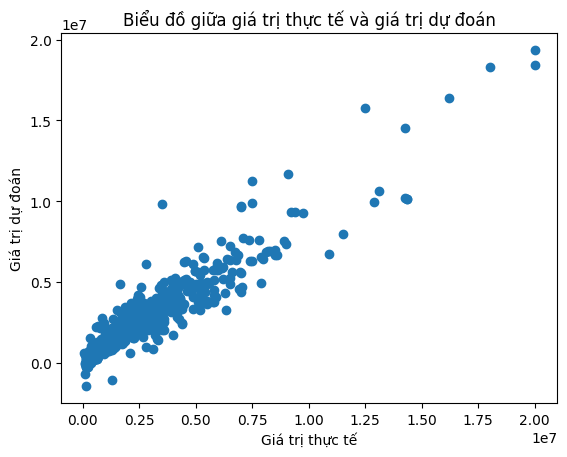

In [82]:
plt.scatter(y_train, predictions)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Biểu đồ giữa giá trị thực tế và giá trị dự đoán")

**Đánh giá trên tập test**

In [83]:
y_pred = model.predict(X_test)
print("MSE: ", model.compute_MSE(y_test, y_pred))
print("MAE: ", model.compute_MAE(y_test, y_pred))
print("R2_score: ", model.compute_r2_score(y_test, y_pred))

MSE:  399751884869.6991
MAE:  363349.3079794626
R2_score:  0.9246062578221489


Text(0.5, 1.0, 'Biểu đồ giữa giá trị test và giá trị dự đoán')

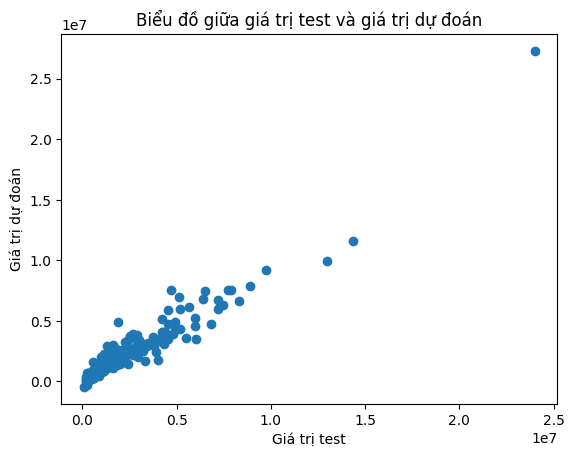

In [84]:
plt.scatter(y_test, y_pred)
plt.xlabel("Giá trị test")
plt.ylabel("Giá trị dự đoán")
plt.title("Biểu đồ giữa giá trị test và giá trị dự đoán")

**Lưu các thông số vào file**

In [85]:
store_values['weight'] = model.weight
store_values['bias'] = model.bias

In [86]:
def convert_np(obj):
    if isinstance(obj, np.float64) or isinstance(obj, np.int64):
        return obj.item()  # Chuyển numpy scalar thành số bình thường
    elif isinstance(obj, np.ndarray):
        return obj.tolist()  # Chuyển numpy array thành list Python
    elif isinstance(obj, pd.Series):
        return obj.to_dict()  # Chuyển pandas Series thành dict
    raise TypeError(f"Type {type(obj)} not serializable")

with open("data.json", "w", encoding="utf-8") as f:
    json.dump(store_values, f, indent=4, default=convert_np)

**Đọc file csv từ đường dẫn và in ra độ chính xác của mô hình**

In [ ]:
file_link = "your_link_here"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
import seaborn as sns
import json


gdown.download(file_link, "test.csv", quiet=False)

with open("data.json", "r", encoding="utf-8") as f:
    store_values = json.load(f)

def clean_data(df):
    df = df.copy()
    df["Engine"] = df["Engine"].str.extract(r'(\d+)').astype("float64")
    df["Max Power"] = df["Max Power"].str.extract(r'(\d+\.?\d*)')[0].astype("float64")
    df["Max Torque"] = df["Max Torque"].str.extract(r'(\d+\.?\d*)')[0].astype("float64")
    return df

def min_max_scaling(X, max_values, min_values):
    # Nếu X là DataFrame (pandas)
    try:
        import pandas as pd
        if isinstance(X, pd.DataFrame):
            X_scaled = X.copy()
            for col in X.columns:
                if col in max_values and col in min_values:
                    # Thực hiện chuẩn hóa cho từng cột
                    X_scaled[col] = (X[col] - min_values[col]) / (max_values[col] - min_values[col])
            return X_scaled
    except ImportError:
        pass

    # Nếu X là dict
    if isinstance(X, dict):
        X_scaled = {}
        for key, value in X.items():
            if key in max_values and key in min_values:
                X_scaled[key] = (value - min_values[key]) / (max_values[key] - min_values[key])
            else:
                # Nếu không có min, max cho key đó thì giữ nguyên giá trị
                X_scaled[key] = value
        return X_scaled

    # Nếu không phải DataFrame hoặc dict thì báo lỗi
    raise TypeError("Kiểu dữ liệu của X không được hỗ trợ. Vui lòng truyền vào DataFrame hoặc dict.")



def build_X_ver3(X_raw):
    X = pd.DataFrame()

    X['Car_Age'] = 2025 - X_raw['Year']
    X['Volume'] = X_raw['Length'] * X_raw['Width']
    X['Engine'] = X_raw['Engine']
    X['Power'] = X_raw['Max Power']
    X['Fuel'] = X_raw['Fuel Tank Capacity']
    X['Make'] = X_raw['Make']
    X['Engine_per_Age'] = X['Engine'] / (X['Car_Age'] + 1)
    X['Power_per_Engine'] = X['Power'] / (X['Engine'] + 1e-6)
    X['Fuel_per_Volume'] = X['Fuel'] / (X['Volume'] + 1e-6)
    X['Make_x_Power'] = X['Make'] * X['Power']
    X['Log_Engine'] = np.log1p(X['Engine'])
    X['Log_Power'] = np.log1p(X['Power'])
    X['Log_Car_Age'] = np.log1p(X['Car_Age'])
    X['Log_Make'] = np.log1p(X['Make'])
    X['Efficiency_Score'] = (X['Power'] / (X['Fuel'] + 1)) * X['Engine_per_Age']
    X['Make_Fuel_Interaction'] = (X['Make'] * X['Fuel']) / (X['Car_Age'] + 1)

    return X


#Mô hình
class RegressionModel:
    def __init__(self):
        self.mean_ = None
        self.std = None
        self.weight = None
        self.bias = None
        self.cost_history = []

    def train(self, X, y):
        """Huấn luyện mô hình Linear Regression"""
        X = X.copy()
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        beta = np.linalg.inv(X.T @ X) @ X.T @ y
        self.bias = beta[0]
        self.weight = beta[1:]

    def compute_MSE(self, y_true, y_pred):
        """Hàm mất mát MSE"""
        if y_pred.shape != y_true.shape:
            raise ValueError("Hai mảng phải có cùng kích thước")
        errors = (y_pred - y_true) ** 2
        mse = np.mean(errors)
        return mse

    def compute_r2_score(self, y_true, y_pred):
        if y_pred.shape != y_true.shape:
            raise ValueError("Hai mảng phải có cùng kích thước")

        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2

    def compute_MAE(self, y_true, y_pred):
        """Hàm mất mát MAE"""
        if y_pred.shape != y_true.shape:
            raise ValueError("Hai mảng phải có cùng kích thước")
        errors = np.abs(y_pred - y_true)
        mae = np.mean(errors)
        return mae

    def predict(self, X):

        if (self.weight is None) or (self.bias is None):
            raise ValueError("Model is not trained yet. Please call train() method first.")

        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ np.concatenate(([self.bias], self.weight))




#Preprocessing
test_df = pd.read_csv("test.csv")
test_df = clean_data(test_df)
test_df = test_df.drop(columns=['Model'])

for col in test_df.select_dtypes(include=[np.number]).columns.tolist():
    test_df[col] = test_df[col].fillna(store_values['num_mean'][col])
for col in test_df.select_dtypes(exclude=[np.number]).columns.tolist():
    test_df[col] = test_df[col].fillna(store_values['str_mode'][col])
for col in test_df.select_dtypes(exclude=[np.number]).columns.tolist():
    if col in store_values['encoded_dict']:
        test_df[col] = test_df[col].map(store_values['encoded_dict'][col])

test_X = test_df[store_values['feature_selected']]
test_X = build_X_ver3(test_X)
test_X = min_max_scaling(test_X, store_values['max'], store_values['min'])
test_y = test_df['Price']
test_y = test_y.values.reshape(-1, 1) if test_y.ndim == 1 else test_y


#Dự đoán
model = RegressionModel()
model.weight = store_values['weight']
model.bias = store_values['bias']
predictions = model.predict(test_X)


#Độ chính xác
print("\nMSE: ",  model.compute_MSE(test_y, predictions))
print("MAE: ",  model.compute_MAE(test_y, predictions))
print("R2_score: ",  model.compute_r2_score(test_y, predictions))


#Đồ thị
plt.scatter(test_y, predictions)
plt.xlabel("Giá trị thuc te")
plt.ylabel("Giá trị dự đoán")
plt.title("Biểu đồ giữa giá trị test và giá trị dự đoán")